In [2]:

#FEATURES:

#Qualification: Qualification and degrees held by the doctor

#Experience: Experience of the doctor in number of years

#Rating: Rating given by patients

#Profile: Type of the doctor

#Miscellaeous_Info: Extra information about the doctor

#Fees: Fees charged by the doctor

#Place: Area and the city where the doctor is located.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [12]:
df1 = pd.read_excel('Final_Train.xlsx')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [13]:
df2 = pd.read_excel('Final_Test.xlsx')
df2

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [15]:
#By converting the Both the datasets into one dataset and listing out(adding the new column as "input")
#combining the two datasets into one dataset using concat.

df1 = pd.read_excel('Final_Train.xlsx')
df1["input"]="train"
df2 = pd.read_excel('Final_Test.xlsx')
df2["input"]="test"
df=pd.concat([df1,df2])
df

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,input
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,train
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train
...,...,...,...,...,...,...,...,...
1982,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,test
1983,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,test
1984,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,test
1985,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,test


In [16]:
#EDA Process

df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,input
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,train
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train


In [17]:
df.tail()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,input
1982,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,test
1983,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,test
1984,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,test
1985,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,test
1986,8 years experience,NaN,"1 Feedback Pallikaranai, Chennai ₹500","Pallikaranai, Chennai",Dermatologists,"MBBS, MD - Dermatology , Venereology & Leprosy",NaN,test


In [18]:
#finding the null values
df.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
input                    0
dtype: int64

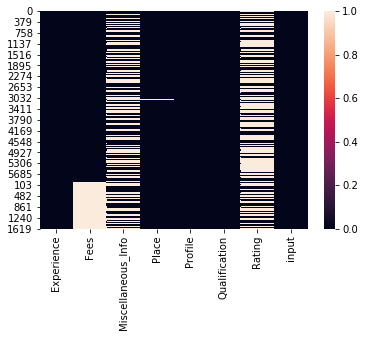

In [19]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [20]:
#Rating Column and Miscellaneous_Info has maximum no of Null value, so we can drop
df.drop('Rating',axis=1,inplace=True)
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [21]:
df

,Experience,Fees,Place,Profile,Qualification,input
0,24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",train
1,12 years experience,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",train
2,9 years experience,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",train
4,20 years experience,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,train
...,...,...,...,...,...,...
1982,10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",test
1983,4 years experience,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",test
1984,9 years experience,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",test
1985,12 years experience,NaN,"Arekere, Bangalore",Dentist,BDS,test


In [22]:
df.isnull().sum()

Experience          0
Fees             1987
Place              31
Profile             0
Qualification       0
input               0
dtype: int64

In [23]:
#Filling Null Values with Mode
for column in ['Place']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [25]:
df.isnull().sum()

Experience          0
Fees             1987
Place               0
Profile             0
Qualification       0
input               0
dtype: int64

In [26]:
df.dtypes

Experience        object
Fees             float64
Place             object
Profile           object
Qualification     object
input             object
dtype: object

In [27]:
#Lets chcek the value counts
df["Place"].value_counts()

Andheri West, Mumbai        128
HSR Layout, Bangalore        97
Dwarka, Delhi                93
Banjara Hills, Hyderabad     85
Mulund West, Mumbai          81
                           ... 
Yemalur, Bangalore            1
Kilokri, Delhi                1
Podanur, Coimbatore           1
Piravom, Ernakulam            1
Rohini Sector 24, Delhi       1
Name: Place, Length: 948, dtype: int64

In [28]:
for column in ['Fees']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [29]:
df.isnull().sum()

Experience       0
Fees             0
Place            0
Profile          0
Qualification    0
input            0
dtype: int64

In [30]:
df

,Experience,Fees,Place,Profile,Qualification,input
0,24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",train
1,12 years experience,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",train
2,9 years experience,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",train
4,20 years experience,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,train
...,...,...,...,...,...,...
1982,10 years experience,100.0,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",test
1983,4 years experience,100.0,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",test
1984,9 years experience,100.0,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",test
1985,12 years experience,100.0,"Arekere, Bangalore",Dentist,BDS,test


In [32]:
df.head(1984)

,Experience,Fees,Place,Profile,Qualification,input
0,24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",train
1,12 years experience,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",train
2,9 years experience,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",train
4,20 years experience,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,train
...,...,...,...,...,...,...
1979,20 years experience,300.0,"Padmanabhanagar, Bangalore",ENT Specialist,"MBBS, Diploma in Otorhinolaryngology (DLO), DN...",train
1980,39 years experience,500.0,"Sheikh Sarai, Delhi",Homeopath,"MD - Homeopathy, Post Graduate Diploma in Medi...",train
1981,51 years experience,400.0,"Washermenpet, Chennai",General Medicine,"MBBS, Fellow of the Royal Australasian College...",train
1982,20 years experience,200.0,"Vijayanagar, Bangalore",Ayurveda,"BAMS, MS - Ayurveda, PhD- Ayurveda, Fellowship...",train


In [33]:
#check the uniqueness of all columnn
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine',
       'MBBS, MS - General Surgery, FAIS, FIAGES',
       'MBBS, MD / MS - Obstetrics & Gynaecology'], dtype=object)

In [34]:
df['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [35]:
df['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [36]:
#All the values of place are unique So I am deleting this colu
df.drop('Place',axis=1,inplace=True)

In [37]:
df['input'].unique()

array(['train', 'test'], dtype=object)

In [38]:
#no need of input column to predict, so am delecting
df.drop('input',axis=1,inplace=True)

In [39]:
df

,Experience,Fees,Profile,Qualification
0,24 years experience,100.0,Homeopath,"BHMS, MD - Homeopathy"
1,12 years experience,350.0,Ayurveda,"BAMS, MD - Ayurveda Medicine"
2,9 years experience,300.0,ENT Specialist,"MBBS, MS - Otorhinolaryngology"
3,12 years experience,250.0,Ayurveda,"BSc - Zoology, BAMS"
4,20 years experience,250.0,Ayurveda,BAMS
...,...,...,...,...
1982,10 years experience,100.0,Ayurveda,"BAMS, Doctor of Medicine"
1983,4 years experience,100.0,Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS"
1984,9 years experience,100.0,General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology"
1985,12 years experience,100.0,Dentist,BDS


In [40]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [41]:
#Converting the columns into Numeric Format using the label encoder

import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==6):#Unique values
        le_anima = preprocessing.LabelEncoder()
        df[cols] = le_anima.fit_transform(df[cols])

In [42]:
df

,Experience,Fees,Profile,Qualification
0,24 years experience,100.0,5,"BHMS, MD - Homeopathy"
1,12 years experience,350.0,0,"BAMS, MD - Ayurveda Medicine"
2,9 years experience,300.0,3,"MBBS, MS - Otorhinolaryngology"
3,12 years experience,250.0,0,"BSc - Zoology, BAMS"
4,20 years experience,250.0,0,BAMS
...,...,...,...,...
1982,10 years experience,100.0,0,"BAMS, Doctor of Medicine"
1983,4 years experience,100.0,2,"MD - Dermatology , Venereology & Leprosy, MBBS"
1984,9 years experience,100.0,4,"MBBS, MD / MS - Obstetrics & Gynaecology"
1985,12 years experience,100.0,1,BDS


In [43]:
array = df['Qualification']

array.shapearray = df['Qualification']

array.shape

(7948,)

In [44]:
le=LabelEncoder()
data1=le.fit_transform(df['Qualification'])
data1

array([ 491,   92, 1442, ..., 1344,  168, 1108])

In [45]:
df['Qualification']=data1

In [46]:
df

,Experience,Fees,Profile,Qualification
0,24 years experience,100.0,5,491
1,12 years experience,350.0,0,92
2,9 years experience,300.0,3,1442
3,12 years experience,250.0,0,572
4,20 years experience,250.0,0,16
...,...,...,...,...
1982,10 years experience,100.0,0,64
1983,4 years experience,100.0,2,1561
1984,9 years experience,100.0,4,1344
1985,12 years experience,100.0,1,168


In [47]:
df["Qualification"].value_counts()

168     632
424     627
16      624
749     441
1366    280
       ... 
938       1
946       1
950       1
954       1
0         1
Name: Qualification, Length: 1801, dtype: int64

In [48]:
#Convert Qualification Column into Experience
array = df['Experience']

array.shapearray = df['Experience']

array.shape

(7948,)

In [49]:
le=LabelEncoder()
data1=le.fit_transform(df['Experience'])
data1

array([16,  3, 63, ..., 63,  3, 62])

In [50]:
df['Experience']=data1

In [51]:
df

,Experience,Fees,Profile,Qualification
0,16,100.0,5,491
1,3,350.0,0,92
2,63,300.0,3,1442
3,3,250.0,0,572
4,12,250.0,0,16
...,...,...,...,...
1982,1,100.0,0,64
1983,33,100.0,2,1561
1984,63,100.0,4,1344
1985,3,100.0,1,168


In [52]:
df.dtypes

Experience         int32
Fees             float64
Profile            int32
Qualification      int32
dtype: object

In [53]:
df = pd.DataFrame(data=df)
df

,Experience,Fees,Profile,Qualification
0,16,100.0,5,491
1,3,350.0,0,92
2,63,300.0,3,1442
3,3,250.0,0,572
4,12,250.0,0,16
...,...,...,...,...
1982,1,100.0,0,64
1983,33,100.0,2,1561
1984,63,100.0,4,1344
1985,3,100.0,1,168


In [54]:
df.dtypes

Experience         int32
Fees             float64
Profile            int32
Qualification      int32
dtype: object

In [55]:
df.isnull().sum()

Experience       0
Fees             0
Profile          0
Qualification    0
dtype: int64

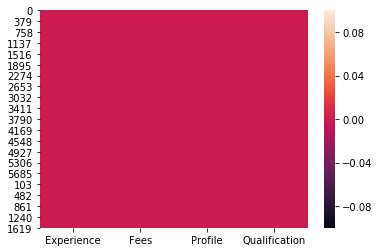

In [56]:
sns.heatmap(df.isnull())

In [57]:
#finding the correlation
dfcor=df.corr()
dfcor

,Experience,Fees,Profile,Qualification
Experience,1.000000,-0.036726,-0.022722,0.006801
Fees,-0.036726,1.000000,0.102136,0.195208
Profile,-0.022722,0.102136,1.000000,0.386709
Qualification,0.006801,0.195208,0.386709,1.000000


In [58]:
df.describe()

,Experience,Fees,Profile,Qualification
count,7948.000000,7948.000000,7948.000000,7948.000000
mean,23.004278,255.958480,2.458606,756.032461
std,20.890855,188.269747,1.657217,525.721528
min,0.000000,5.000000,0.000000,0.000000
25%,6.000000,100.000000,1.000000,284.750000
50%,15.000000,200.000000,2.000000,749.000000
75%,35.000000,400.000000,4.000000,1193.000000
max,63.000000,950.000000,5.000000,1800.000000


In [60]:
df.shape

(7948, 4)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 4 columns):
Experience       7948 non-null int32
Fees             7948 non-null float64
Profile          7948 non-null int32
Qualification    7948 non-null int32
dtypes: float64(1), int32(3)
memory usage: 217.3 KB


In [62]:
df.keys()

Index(['Experience', 'Fees', 'Profile', 'Qualification'], dtype='object')

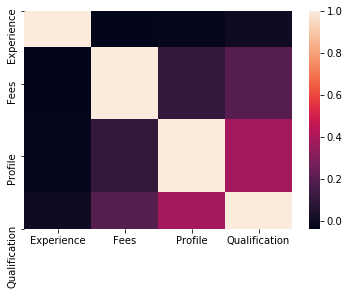

In [63]:
sns.heatmap(dfcor)

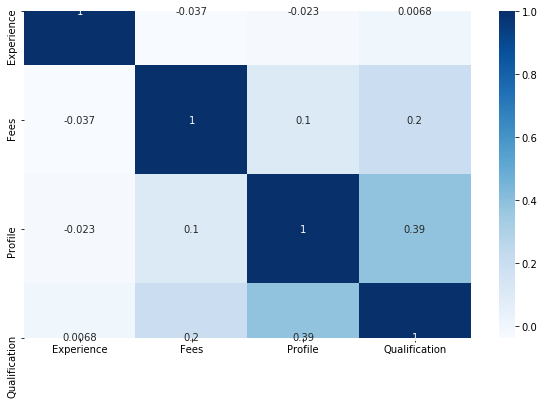

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

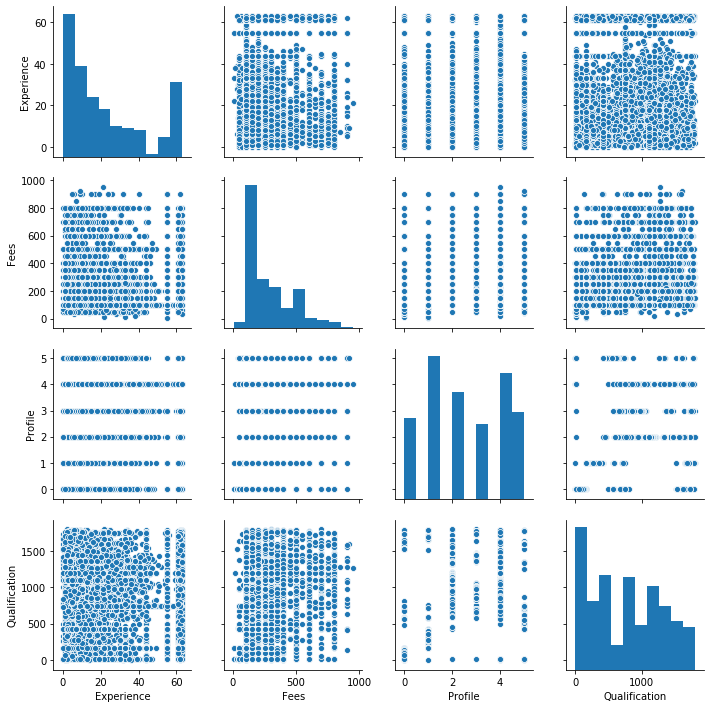

In [65]:
sns.pairplot(df)

In [66]:
#finding the skewness

df.skew()

Experience       0.826304
Fees             1.100649
Profile          0.088789
Qualification    0.247541
dtype: float64

In [67]:
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()

Experience      -0.373410
Fees             0.270084
Profile          0.088789
Qualification    0.247541
dtype: float64

In [68]:
#finding/removing the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (7948, 4)
df1.shape: (7944, 4)
z value is: [[0.12316491 0.95983107 1.53362797 0.50416261]
 [1.22188281 0.79817152 1.4836687  1.26316729]
 [1.35550002 0.58128931 0.3267093  1.30489368]
 ...
 [1.35550002 0.95983107 0.93016863 1.11847147]
 [1.22188281 0.95983107 0.88020937 1.11859497]
 [1.34086044 0.95983107 0.27675003 0.66953637]]


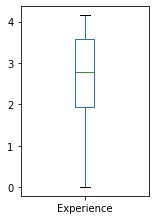

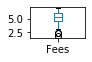

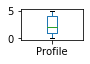

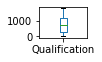

In [69]:
#Boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

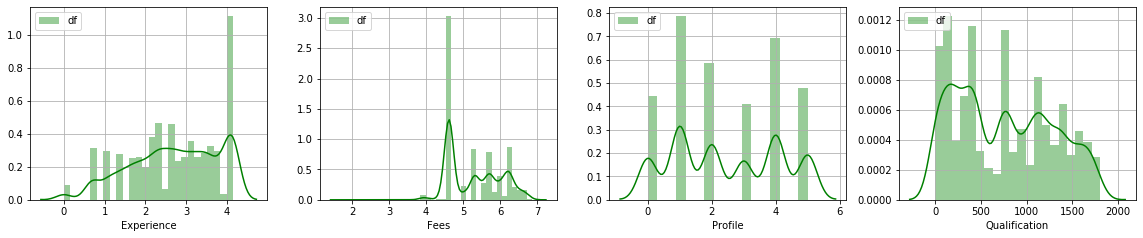

In [70]:
#Plotting Displot Through Iteratio
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='df')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

In [71]:
df.keys()

Index(['Experience', 'Fees', 'Profile', 'Qualification'], dtype='object')

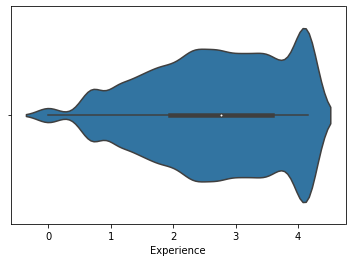

In [73]:
#violin plot representation with respect to each column

sns.violinplot(x="Experience",data=df)

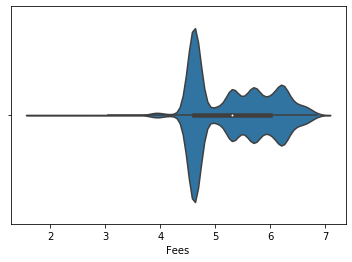

In [74]:
#violin plot representation with respect to each column

sns.violinplot(x="Fees",data=df)

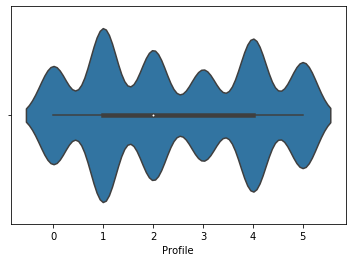

In [75]:
#violin plot representation with respect to each column

sns.violinplot(x="Profile",data=df)

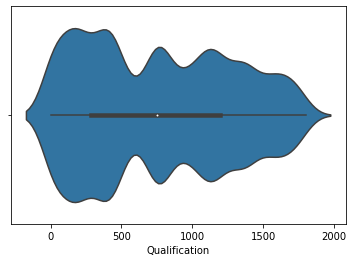

In [76]:
#violin plot representation with respect to each column

sns.violinplot(x="Qualification",data=df)

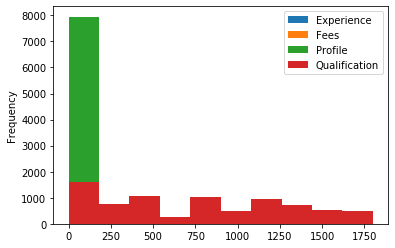

In [77]:
df.plot.hist()

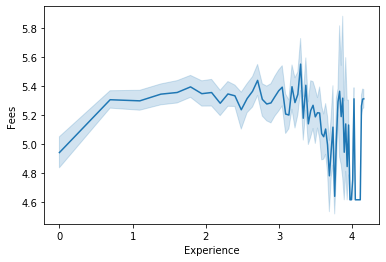

In [78]:
#Line plot representation
sns.lineplot(df["Experience"],df["Fees"])
plt.show()

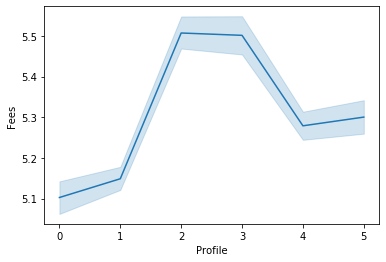

In [80]:
#Line plot representation
sns.lineplot(df["Profile"],df["Fees"])
plt.show()

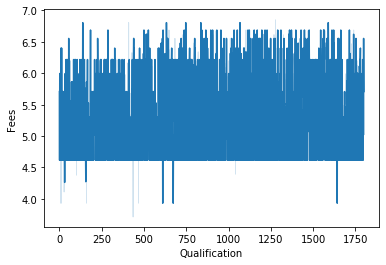

In [81]:
sns.lineplot(df["Qualification"],df["Fees"])
plt.show()

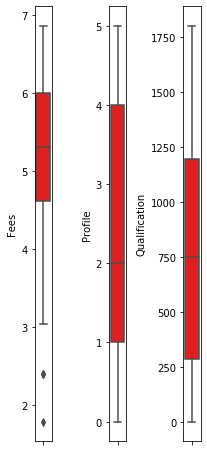

In [82]:
#column Plot
collist = df.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [83]:
df.keys()

Index(['Experience', 'Fees', 'Profile', 'Qualification'], dtype='object')

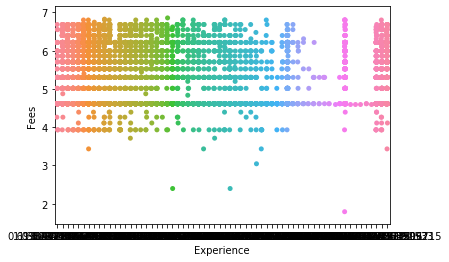

In [84]:
#strip plot representation

ax=sns.stripplot(x='Experience',y="Fees",data=df);

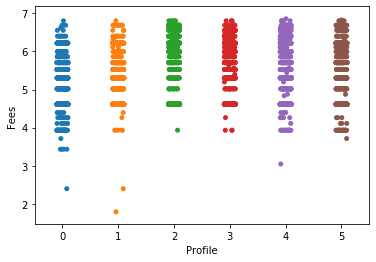

In [85]:
ax=sns.stripplot(x='Profile',y="Fees",data=df);

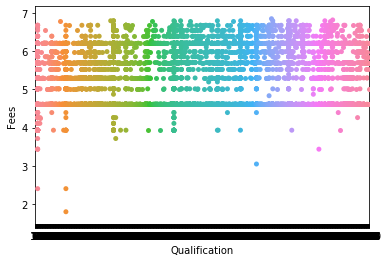

In [86]:
ax=sns.stripplot(x='Qualification',y="Fees",data=df);

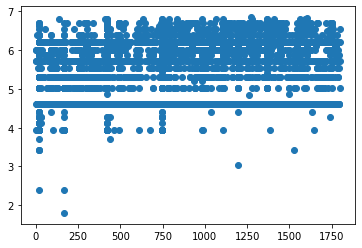

In [88]:
#using Scatter Plot
plt.scatter(df['Qualification'],df['Fees'])

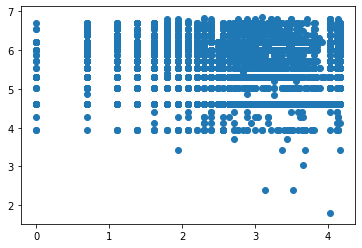

In [89]:
plt.scatter(df['Experience'],df['Fees'])

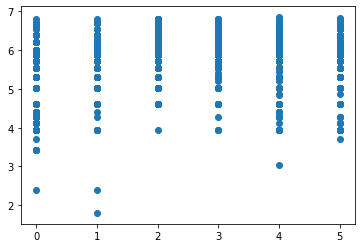

In [90]:
plt.scatter(df['Profile'],df['Fees'])

In [91]:
df.keys()

Index(['Experience', 'Fees', 'Profile', 'Qualification'], dtype='object')

In [92]:
#Separating X and Y Variable to predict the dataset

X = df.drop("Fees", axis=1)
X

,Experience,Profile,Qualification
0,2.833213,5,491
1,1.386294,0,92
2,4.158883,3,1442
3,1.386294,0,572
4,2.564949,0,16
...,...,...,...
1982,0.693147,0,64
1983,3.526361,2,1561
1984,4.158883,4,1344
1985,1.386294,1,168


In [93]:
Y = df["Fees"]
Y

0       4.615121
1       5.860786
2       5.707110
3       5.525453
4       5.525453
          ...   
1982    4.615121
1983    4.615121
1984    4.615121
1985    4.615121
1986    4.615121
Name: Fees, Length: 7948, dtype: float64

In [94]:
X.shape

(7948, 3)

In [95]:
Y.shape

(7948,)

In [96]:
Y = Y.values.reshape(-1,1)
Y

array([[4.61512052],
       [5.86078622],
       [5.70711026],
       ...,
       [4.61512052],
       [4.61512052],
       [4.61512052]])

In [97]:
Y.shape

(7948, 1)

In [98]:
#splitting the data into training and testing

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.35,random_state=39)

In [99]:
train_X.shape

(5166, 3)

In [100]:
train_Y.shape

(5166, 1)

In [101]:
test_Y.shape

(2782, 1)

In [102]:
test_X.shape

(2782, 3)

In [103]:
#Applying the regression techinque
#Linear Regression

lg=LinearRegression()
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
lg.coef_

array([[-0.01414665,  0.01743979,  0.00019371]])

In [105]:
lg.intercept_

array([5.14270153])

In [106]:
pred=lg.predict(test_X)
print(pred)

[[5.13384994]
 [5.28261539]
 [5.41063494]
 ...
 [5.30222681]
 [5.425332  ]
 [5.40079135]]


In [107]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result:",pred)
print("actual result",test_Y)

Predicted result: [[5.13384994]
 [5.28261539]
 [5.41063494]
 ...
 [5.30222681]
 [5.425332  ]
 [5.40079135]]
actual result [[4.61512052]
 [4.61512052]
 [5.99396143]
 ...
 [4.61512052]
 [5.30330491]
 [5.01727984]]


In [108]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.621252721163103
Mean sqaured error: 0.4817500660689366
Root mean squared error: 0.6940821752998247


In [109]:
#Boost through GradientBoostRegressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.08975322607806091
Mean squared error: 0.46
R2 Score: 0.08


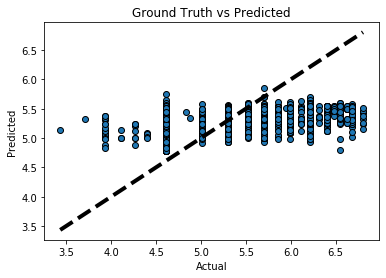

In [111]:
#visuvalize the pridicted value
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [112]:
#using Recurrsion
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [114]:
# Lets use LinearRegression and check the max r2 score with diff levels
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.03590819447131843
r2 score corresponding to  43 is 0.02734563155642511
r2 score corresponding to  44 is 0.013112095672136226
r2 score corresponding to  45 is 0.02549983017674473
r2 score corresponding to  46 is 0.025466142281368898
r2 score corresponding to  47 is 0.033834247152960906
r2 score corresponding to  48 is 0.03134216247767063
r2 score corresponding to  49 is 0.02578765917506065
r2 score corresponding to  50 is 0.026368908665296287
r2 score corresponding to  51 is 0.031211898408554872
r2 score corresponding to  52 is 0.03225597834124927
r2 score corresponding to  53 is 0.02697858020404653
r2 score corresponding to  54 is 0.029433945911674586
r2 score corresponding to  55 is 0.02966791583728301
r2 score corresponding to  56 is 0.03906805792310619
r2 score corresponding to  57 is 0.013926746226226583
r2 score corresponding to  58 is 0.028585445419432087
r2 score corresponding to  59 is 0.03506872435621833
r2 score corresponding to  60 is 0.030

In [116]:
#Boosting Linear Regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.004460326218804989
std deviation in r2 score for ada boosting Regression:  0.012432014057308557


In [117]:
#KNN Model to predict
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 0.54
R2 Score of linear svc: -0.08


In [118]:
#use grid_search to find optimal value of n_neighbors for KNN Modl
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 29}

In [119]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=29)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.06024724466173825
r2 score corresponding to  43 is 0.04170649978270691
r2 score corresponding to  44 is 0.014135528952058496
r2 score corresponding to  45 is 0.03826222653820466
r2 score corresponding to  46 is 0.038146834189784706
r2 score corresponding to  47 is 0.04269648098023038
r2 score corresponding to  48 is 0.0488857990758389
r2 score corresponding to  49 is 0.04252773426225365
r2 score corresponding to  50 is 0.029630448578815582
r2 score corresponding to  51 is 0.0390328649499202
r2 score corresponding to  52 is 0.026266100525658254
r2 score corresponding to  53 is 0.03170252730862155
r2 score corresponding to  54 is 0.03731913288784772
r2 score corresponding to  55 is 0.02787691553087357
r2 score corresponding to  56 is 0.05801031633718601
r2 score corresponding to  57 is 0.01643762058571807
r2 score corresponding to  58 is 0.04153032440865523
r2 score corresponding to  59 is 0.03903524207855513
r2 score corresponding to  60 is 0.049694983

In [120]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: -0.06769167644646916
Standard deviation in r2 scorefor Linear Regression: 0.07633968669299124

Mean r2 score for KNN Regression:  -0.041852015978877624
Stadard deviation in r2 score for KNN Regression: 0.0565535807160891


In [121]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: -0.06769167644646916
std deviation in r2 scorefor Linear Regression: 0.07633968669299124

Mean r2 score for KNN Regression:  -0.041852015978877624
std deviation in r2 score for KNN Regression: 0.0565535807160891


In [122]:
#Boosting KNN model
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.0035520465225366894
std deviation in r2 score for ada boosting Regression:  0.01048591963350269


In [123]:
#check lasso regression and best value of alph
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=15)
clf.fit(X,Y)
clf.best_params_

{'alpha': 1}

In [124]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 1)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  -0.06941119106980864
std deviation in r2 score for Lasso Regression:  0.07648633228230167


In [125]:
#Boosting Lasso Regressor
from sklearn.ensemble import AdaBoostRegressor
ada3=AdaBoostRegressor()
add3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada3,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.002894088410432083
std deviation in r2 score for ada boosting Regression:  0.008645749281495153


In [126]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "rbf")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.55
R2 Score of linear svc: -0.10


In [127]:
#Boosting Support Vector Machine
from sklearn.ensemble import AdaBoostRegressor
ada4=AdaBoostRegressor()
add4=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada4,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.0015094062155655674
std deviation in r2 score for ada boosting Regression:  0.011587913547123296


In [128]:
#Decision Tree Regressorr
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 1)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y4))
print('R2 Score : %.2f' % r2_score(test_Y, y4))

Mean squared error of Decision Tree Regressor: 0.22
R2 Score : 0.56


In [129]:
#predict the value
pred=dtregressor.predict(test_X)
print("Predicted result :",y4)
print("actual price",test_Y)

Predicted result : [6.2166061  4.61512052 5.27328673 ... 5.21986783 5.30330491 4.61512052]
actual price [[6.2166061 ]
 [4.61512052]
 [5.70711026]
 ...
 [4.61512052]
 [5.30330491]
 [4.61512052]]


In [130]:
#Boosting Decision Tree
from sklearn.ensemble import AdaBoostRegressor
reg5=AdaBoostRegressor()
reg5=AdaBoostRegressor(base_estimator=dtregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(reg5,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(reg5,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.4089194321198731
std deviation in r2 score for ada boosting Regression:  0.23038202098579766


In [131]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_p5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_p5))
print('R2 Score : %.2f' % r2_score(test_Y, y_p5))

Mean squared error of poly svc: 0.59
R2 Score : -0.20


In [132]:
rf_gs = RandomForestRegressor(n_estimators=120)

In [133]:
n_features = X.shape[1]

In [134]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 1, 'max_depth': 5}


In [135]:
rf_gss = RandomForestRegressor(max_features = 2, max_depth = 6)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  -0.02565752395286618
std deviation in r2 score for ada boosting Regression:  0.053646077724556665


In [136]:
#all the models,dtregressor gives the Highest r2 score(56) and mean squared error is .22, so we can save this model

In [137]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 18_Predict_Doctor_test_train.csv')

In [138]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtregressor,'Doctor_predict_traintest.pkl')

['Doctor_predict_traintest.pkl']